In [38]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [39]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [40]:
len(X_train)

60000

In [41]:
len(X_test)

10000

In [42]:
X_train[0].shape

(28, 28)

In [43]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

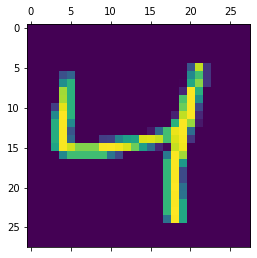

In [44]:
plt.matshow(X_train[2])

In [45]:
y_train[2]

4

In [46]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [47]:
X_train.shape

(60000, 28, 28)

In [54]:
X_train = X_train / 255
X_test = X_test / 255

In [55]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [56]:
X_test_flattened.shape

(10000, 784)

In [57]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [58]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model.compile(
    optimizer = 'adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4669 - accuracy: 0.8769
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3036 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2832 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2726 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2661 - accuracy: 0.9264


In [59]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2695 - accuracy: 0.9234


[0.2695236802101135, 0.9233999848365784]

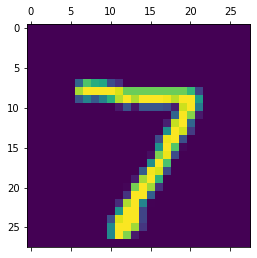

In [61]:
plt.matshow(X_test[0])

In [60]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([1.3091952e-02, 2.8039926e-07, 5.5696130e-02, 9.6953958e-01,
       3.7156343e-03, 1.2289101e-01, 1.4180140e-06, 9.9984026e-01,
       8.9116156e-02, 6.9862777e-01], dtype=float32)

In [63]:
np.argmax(y_predicted[0])

7

In [64]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [65]:
y_predicted_labels[:5]


[7, 2, 1, 0, 4]

In [66]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 954,    0,    2,    2,    0,    8,    7,    3,    3,    1],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   5,   10,  908,   23,   10,    5,   12,   11,   45,    3],
       [   3,    0,   16,  928,    1,   22,    3,   12,   18,    7],
       [   1,    1,    4,    1,  923,    0,   11,    4,   10,   27],
       [   7,    2,    1,   38,   11,  769,   17,    7,   34,    6],
       [  10,    3,    5,    2,    8,   10,  915,    2,    3,    0],
       [   1,    5,   19,   11,    8,    0,    0,  957,    3,   24],
       [   5,    8,    5,   28,    9,   24,   10,   12,  866,    7],
       [   9,    7,    1,   12,   35,    7,    0,   27,    6,  905]])>

Text(69.0, 0.5, 'Truth')

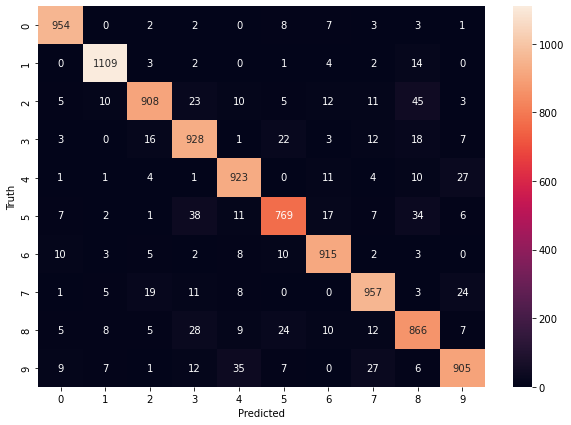

In [67]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [68]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2790 - accuracy: 0.9214
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1267 - accuracy: 0.9623
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0913 - accuracy: 0.9729
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0697 - accuracy: 0.9786
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0552 - accuracy: 0.9831


In [69]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0981 - accuracy: 0.9700


[0.09813546389341354, 0.9700000286102295]

Text(69.0, 0.5, 'Truth')

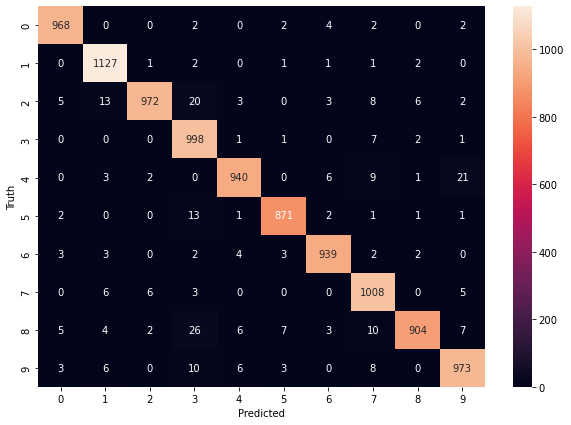

In [71]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [72]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2788 - accuracy: 0.9211
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1257 - accuracy: 0.9622
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0879 - accuracy: 0.9729
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0668 - accuracy: 0.9796
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0531 - accuracy: 0.9830
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0420 - accuracy: 0.9871
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0345 - accuracy: 0.9896
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0292 - accuracy: 0.9908
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0248 - accuracy: 0.9923
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.021

In [73]:
cnn = models.Sequential([
    layers.Conv2D(filters = 32, kernelsize = (3,3)), activation = 'relue', input_shape = (32,32,3)
    layers.Maxpoolind2D((2,2), strides = (2,2), padding = 'valid'  )
])

In [ ]:
plt.plot(Image)